In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [4]:
# Generate synthetic data
np.random.seed(0)
num_samples = 1000
tenure = np.random.randint(1, 72, size=num_samples)
monthly_charges = np.random.uniform(20, 120, size=num_samples)
total_charges = tenure * monthly_charges
churn_prob = np.exp(-(tenure / 12)) / (1 + np.exp(-(tenure / 12)))
churn = np.random.binomial(1, churn_prob)

In [5]:
# Create a pandas DataFrame
data = pd.DataFrame({'tenure': tenure, 'monthly_charges': monthly_charges, 'total_charges': total_charges, 'churn': churn})

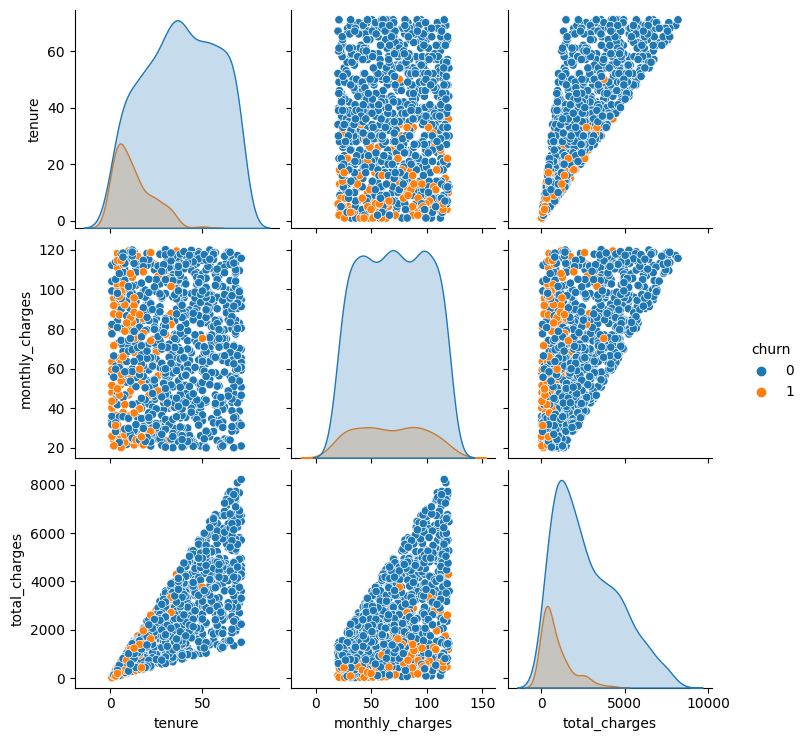

In [6]:
# Perform data visualization
sns.pairplot(data, hue='churn', vars=['tenure', 'monthly_charges', 'total_charges'])
plt.show()

In [7]:
# Prepare the data for modeling
X = data.drop('churn', axis=1)
y = data['churn']

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [12]:
# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [13]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

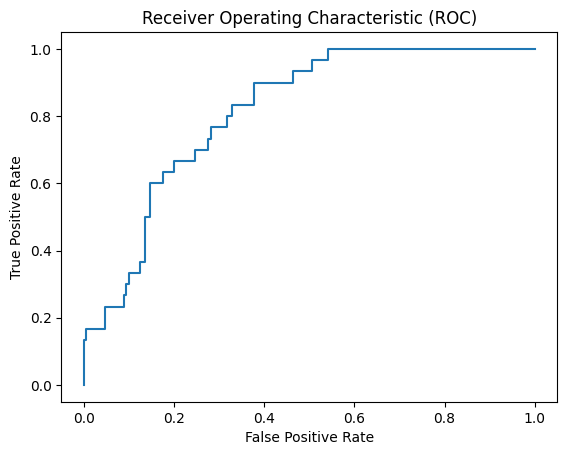

In [14]:
# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

In [15]:

print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion)
print('AUC:', auc)

Accuracy: 0.87
Confusion Matrix:
[[169   1]
 [ 25   5]]
AUC: 0.813921568627451
